# Trace Generation

After manually finish the encoding for all distinct events, next step is to generate the traces from the event log to analyse the variability

In [1]:
import csv
from datetime import datetime

In [2]:
with open('events_encoding.csv', newline='') as file:
    reader = csv.reader(file)
    event_code = list(reader)

file.close()
print(event_code)

[['EventName', 'EventCode'], ['Glucose', 'L1'], ['CBC', 'L2'], ['ABG', 'L3'], ['Specimen Type', 'L4'], ['Electrolytes', 'L5'], ['Calcium', 'L6'], ['Creatinine', 'L7'], ['Urea Nitrogen', 'L8'], ['Metoprolol', 'M1'], ['Diuretic', 'M2'], ['Insulin', 'M3'], ['Acetaminophen', 'M4'], ['Ranitidine', 'M5'], ['Aspirin', 'M6'], ['Opioid', 'M7'], ['Dextrose 50%', 'M8'], ['Magnesium Sulfate', 'M9'], ['Propofol', 'M10'], ['CefazoLIN', 'M11'], ['Nitroglycerin', 'M12'], ['Amiodarone', 'M13'], ['Metoclopramide', 'M14'], ['Ketorolac', 'M15'], ['PHENYLEPHrine', 'M16'], ['Warfarin', 'M17'], ['Calcium Gluconate', 'M18'], ['Glucagon', 'M19'], ['Lipid Loweding', 'M20'], ['Oxycodone-Acetaminophen', 'M21'], ['Albumin', 'M22'], ['HydrALAzine', 'M23'], ['Vancomycin', 'M24'], ['Ondansetron', 'M25'], ['Lisinopril', 'M26'], ['Albuterol', 'M27'], ['MetFORMIN (Glucophage)', 'M28'], ['Lorazepam', 'M29'], ['Clopidogrel', 'M30'], ['Pantoprazole', 'M31'], ['CSURG', 'S1'], ['MED', 'S2'], ['CMED', 'S3'], ['SURG', 'S4'], [

Create a dictionary to hold the encoding relationship

In [3]:
#create the dict to hold the conversion relationship
encoding_dict = {}
for event in event_code[1:]:
    encoding_dict[event[0]] = event[1]
print(encoding_dict)

{'Glucose': 'L1', 'CBC': 'L2', 'ABG': 'L3', 'Specimen Type': 'L4', 'Electrolytes': 'L5', 'Calcium': 'L6', 'Creatinine': 'L7', 'Urea Nitrogen': 'L8', 'Metoprolol': 'M1', 'Diuretic': 'M2', 'Insulin': 'M3', 'Acetaminophen': 'M4', 'Ranitidine': 'M5', 'Aspirin': 'M6', 'Opioid': 'M7', 'Dextrose 50%': 'M8', 'Magnesium Sulfate': 'M9', 'Propofol': 'M10', 'CefazoLIN': 'M11', 'Nitroglycerin': 'M12', 'Amiodarone': 'M13', 'Metoclopramide': 'M14', 'Ketorolac': 'M15', 'PHENYLEPHrine': 'M16', 'Warfarin': 'M17', 'Calcium Gluconate': 'M18', 'Glucagon': 'M19', 'Lipid Loweding': 'M20', 'Oxycodone-Acetaminophen': 'M21', 'Albumin': 'M22', 'HydrALAzine': 'M23', 'Vancomycin': 'M24', 'Ondansetron': 'M25', 'Lisinopril': 'M26', 'Albuterol': 'M27', 'MetFORMIN (Glucophage)': 'M28', 'Lorazepam': 'M29', 'Clopidogrel': 'M30', 'Pantoprazole': 'M31', 'CSURG': 'S1', 'MED': 'S2', 'CMED': 'S3', 'SURG': 'S4', 'TSURG': 'S5', 'Admission': 'A', 'Discharge': 'D'}


Substitute the event name with the codes

In [4]:
with open('events_final.csv', newline='') as file1:
    reader1 = csv.reader(file1)
    final_filtered_events = list(reader1)

file1.close()
print(final_filtered_events[:10])

[['PatientID', 'Events', 'StartTime'], ['10002013', 'CBC', '2160-05-18T09:19:00'], ['10002013', 'Calcium', '2160-05-18T09:19:00'], ['10002013', 'ABG', '2160-05-18T09:19:00'], ['10002013', 'ABG', '2160-05-18T09:19:00'], ['10002013', 'CBC', '2160-05-18T09:19:00'], ['10002013', 'ABG', '2160-05-18T09:19:00'], ['10002013', 'Glucose', '2160-05-18T09:19:00'], ['10002013', 'ABG', '2160-05-18T09:19:00'], ['10002013', 'Electrolytes', '2160-05-18T09:19:00']]


In [5]:
#convert the events into codes
for event in final_filtered_events[1:]:
    if event[1] in encoding_dict.keys():
        event[1] = encoding_dict[event[1]]
    #else:
        #event[1] = 'NOT ENCODED, PLEASE CHECK AGAIN'
print(final_filtered_events[:20])

[['PatientID', 'Events', 'StartTime'], ['10002013', 'L2', '2160-05-18T09:19:00'], ['10002013', 'L6', '2160-05-18T09:19:00'], ['10002013', 'L3', '2160-05-18T09:19:00'], ['10002013', 'L3', '2160-05-18T09:19:00'], ['10002013', 'L2', '2160-05-18T09:19:00'], ['10002013', 'L3', '2160-05-18T09:19:00'], ['10002013', 'L1', '2160-05-18T09:19:00'], ['10002013', 'L3', '2160-05-18T09:19:00'], ['10002013', 'L5', '2160-05-18T09:19:00'], ['10002013', 'L3', '2160-05-18T09:19:00'], ['10002013', 'L5', '2160-05-18T09:19:00'], ['10002013', 'L5', '2160-05-18T09:19:00'], ['10002013', 'L4', '2160-05-18T09:19:00'], ['10002013', 'L5', '2160-05-18T10:26:00'], ['10002013', 'L3', '2160-05-18T10:26:00'], ['10002013', 'L1', '2160-05-18T10:26:00'], ['10002013', 'L2', '2160-05-18T10:26:00'], ['10002013', 'L6', '2160-05-18T10:26:00'], ['10002013', 'L3', '2160-05-18T10:26:00']]


double check if all the events have been encoded

In [6]:
#find if there is any event that has not been encoded yet
for event in final_filtered_events[1:]:
    if len(event[1]) > 3:
        print(event)


Nothing has been printed out, meaning that all events have been converted successfully

In [7]:
#write to file for the encoded event log
write_file = open('encoded_event.csv', 'w')
writer = csv.writer(write_file)
for row in final_filtered_events:
    writer.writerow([row[0], row[1], row[2]])
write_file.close()

In the next step, we will start to generat the trace

In [8]:
#create a dict as the trace matrix to hold all traces
trace_raw = dict()
for event in final_filtered_events[1:]:
    if event[0] not in trace_raw.keys():
        trace_raw[event[0]] = [[event[1], event[2]]]
    else:
        trace_raw[event[0]].append([event[1], event[2]])
print(trace_raw['10002013'])

[['L2', '2160-05-18T09:19:00'], ['L6', '2160-05-18T09:19:00'], ['L3', '2160-05-18T09:19:00'], ['L3', '2160-05-18T09:19:00'], ['L2', '2160-05-18T09:19:00'], ['L3', '2160-05-18T09:19:00'], ['L1', '2160-05-18T09:19:00'], ['L3', '2160-05-18T09:19:00'], ['L5', '2160-05-18T09:19:00'], ['L3', '2160-05-18T09:19:00'], ['L5', '2160-05-18T09:19:00'], ['L5', '2160-05-18T09:19:00'], ['L4', '2160-05-18T09:19:00'], ['L5', '2160-05-18T10:26:00'], ['L3', '2160-05-18T10:26:00'], ['L1', '2160-05-18T10:26:00'], ['L2', '2160-05-18T10:26:00'], ['L6', '2160-05-18T10:26:00'], ['L3', '2160-05-18T10:26:00'], ['L3', '2160-05-18T10:26:00'], ['L2', '2160-05-18T10:26:00'], ['L3', '2160-05-18T10:26:00'], ['L4', '2160-05-18T10:26:00'], ['L5', '2160-05-18T10:26:00'], ['L5', '2160-05-18T10:26:00'], ['L3', '2160-05-18T10:26:00'], ['L2', '2160-05-18T11:23:00'], ['L3', '2160-05-18T11:23:00'], ['L1', '2160-05-18T11:23:00'], ['L5', '2160-05-18T11:23:00'], ['L3', '2160-05-18T11:23:00'], ['L2', '2160-05-18T11:23:00'], ['L3', 

Order the traces based on the timestamp. However, the timestamp is stored in the form of string so a conversion is required. After converting to the correct time, we will sort the event based on the time.

In [9]:
for item in trace_raw.values():
    for i in range(len(item)):
        item[i][1] = datetime.strptime(item[i][1], '%Y-%m-%d''T''%H:%M:%S')
    item.sort(key = lambda x:x[1])
print(trace_raw['10002013'])

[['S1', datetime.datetime(2160, 5, 18, 1, 49, 32)], ['A', datetime.datetime(2160, 5, 18, 7, 45)], ['L2', datetime.datetime(2160, 5, 18, 9, 19)], ['L6', datetime.datetime(2160, 5, 18, 9, 19)], ['L3', datetime.datetime(2160, 5, 18, 9, 19)], ['L3', datetime.datetime(2160, 5, 18, 9, 19)], ['L2', datetime.datetime(2160, 5, 18, 9, 19)], ['L3', datetime.datetime(2160, 5, 18, 9, 19)], ['L1', datetime.datetime(2160, 5, 18, 9, 19)], ['L3', datetime.datetime(2160, 5, 18, 9, 19)], ['L5', datetime.datetime(2160, 5, 18, 9, 19)], ['L3', datetime.datetime(2160, 5, 18, 9, 19)], ['L5', datetime.datetime(2160, 5, 18, 9, 19)], ['L5', datetime.datetime(2160, 5, 18, 9, 19)], ['L4', datetime.datetime(2160, 5, 18, 9, 19)], ['M20', datetime.datetime(2160, 5, 18, 10, 0)], ['M30', datetime.datetime(2160, 5, 18, 10, 0)], ['L5', datetime.datetime(2160, 5, 18, 10, 26)], ['L3', datetime.datetime(2160, 5, 18, 10, 26)], ['L1', datetime.datetime(2160, 5, 18, 10, 26)], ['L2', datetime.datetime(2160, 5, 18, 10, 26)], ['L

In [10]:
print(len(trace_raw['10002013']))

255


For events with a timestamp that is too close, if they are of the same type of events(i.e. all of them are lab events), we will integrate them together to reduce the dimention of the data.

In [85]:
"""
#integrate events
for item in trace_raw.values():
    #temp_holder = []
    for i in range(1, len(item)):
        min_diff = (item[i][1] - item[i - 1][1]).seconds / 60
        if (min_diff) < 10 and (item[i][0][0] == item[i - 1][0][0]):
            if len(item[i][0]) == 1: #refer to A & D
                item[i][0] = item[i][0] + '*'
            elif len(item[i][0]) == 2: #refer to L1, M2, etc.
                item[i][0] = item[i][0][0] + '*'
            else: #refer to length> 2 like L31
                item[i][0] = item[i][0][0] + '*' #integrated events are labelled in a different way
            item[i - 1] = []

print(trace_raw['10002013'])
"""

[['S1', datetime.datetime(2160, 5, 18, 1, 49, 32)], ['A', datetime.datetime(2160, 5, 18, 7, 45)], [], [], [], [], [], [], [], [], [], [], [], [], ['L*', datetime.datetime(2160, 5, 18, 9, 19)], [], ['M*', datetime.datetime(2160, 5, 18, 10, 0)], [], [], [], [], [], [], [], [], [], [], [], [], ['L*', datetime.datetime(2160, 5, 18, 10, 26)], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['M*', datetime.datetime(2160, 5, 18, 11, 0)], [], [], [], [], [], [], [], [], [], [], [], [], ['L*', datetime.datetime(2160, 5, 18, 11, 23)], [], [], [], [], [], [], [], [], [], [], [], [], ['L*', datetime.datetime(2160, 5, 18, 12, 20)], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['L*', datetime.datetime(2160, 5, 18, 13, 2)], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['L*', datetime.datetime(2160, 5, 18, 14, 46)], [], [], [], [], [], [], [], ['L*', datetime.datetime(2160, 5, 18, 16, 3)], [], [], [],

In [11]:
#integrate events
naming_counter = 0 #the normal encoding is till 31
for item in trace_raw.values():
    naming_counter = 0
    for i in range(1, len(item)):
        min_diff = (item[i][1] - item[i - 1][1]).seconds / 60
        if (min_diff) < 10 and (item[i][0][0] == item[i - 1][0][0]): #the two event happened within 10 min, then merge
            item[i][0] = item[i][0][0] + 'C' + str(naming_counter) #integrated events are labelled in a different way
            item[i - 1] = []
            naming_counter += 1

print(trace_raw['10002013'])

[['S1', datetime.datetime(2160, 5, 18, 1, 49, 32)], ['A', datetime.datetime(2160, 5, 18, 7, 45)], [], [], [], [], [], [], [], [], [], [], [], [], ['LC11', datetime.datetime(2160, 5, 18, 9, 19)], [], ['MC12', datetime.datetime(2160, 5, 18, 10, 0)], [], [], [], [], [], [], [], [], [], [], [], [], ['LC24', datetime.datetime(2160, 5, 18, 10, 26)], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['MC40', datetime.datetime(2160, 5, 18, 11, 0)], [], [], [], [], [], [], [], [], [], [], [], [], ['LC52', datetime.datetime(2160, 5, 18, 11, 23)], [], [], [], [], [], [], [], [], [], [], [], [], ['LC64', datetime.datetime(2160, 5, 18, 12, 20)], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['LC85', datetime.datetime(2160, 5, 18, 13, 2)], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['LC108', datetime.datetime(2160, 5, 18, 14, 46)], [], [], [], [], [], [], [], ['LC115', datetime.datetime(2160, 5, 18, 

In [12]:
print(len(trace_raw['10002013']))

255


In [13]:
for item in trace_raw.values():
    for event in item[:]:
        if len(event) == 0:
            item.remove(event)

print(trace_raw['10002013'])

[['S1', datetime.datetime(2160, 5, 18, 1, 49, 32)], ['A', datetime.datetime(2160, 5, 18, 7, 45)], ['LC11', datetime.datetime(2160, 5, 18, 9, 19)], ['MC12', datetime.datetime(2160, 5, 18, 10, 0)], ['LC24', datetime.datetime(2160, 5, 18, 10, 26)], ['MC40', datetime.datetime(2160, 5, 18, 11, 0)], ['LC52', datetime.datetime(2160, 5, 18, 11, 23)], ['LC64', datetime.datetime(2160, 5, 18, 12, 20)], ['LC85', datetime.datetime(2160, 5, 18, 13, 2)], ['LC108', datetime.datetime(2160, 5, 18, 14, 46)], ['LC115', datetime.datetime(2160, 5, 18, 16, 3)], ['LC118', datetime.datetime(2160, 5, 18, 17, 30)], ['LC125', datetime.datetime(2160, 5, 18, 17, 42)], ['M23', datetime.datetime(2160, 5, 18, 18, 0)], ['MC127', datetime.datetime(2160, 5, 18, 20, 0)], ['MC128', datetime.datetime(2160, 5, 18, 21, 0)], ['LC136', datetime.datetime(2160, 5, 18, 21, 32)], ['M1', datetime.datetime(2160, 5, 18, 22, 0)], ['M4', datetime.datetime(2160, 5, 19, 0, 0)], ['M22', datetime.datetime(2160, 5, 19, 3, 0)], ['LC150', date

In [14]:
print(len(trace_raw['10002013']))

43


After sorting and integrating, separate the timestamp and generate the true trace matrix. Here we will prepare the trace matrix into two forms, the first is a dictionary with the key as the patient ID and the value as the trace of that patient. The second is a 2D list with each list inside the big list is a trace for one patient.

In [15]:
trace_matrix_dict = dict()
trace_matirx = []
timestamp_matrix = []

for key, value in trace_raw.items():
    trace_matrix_dict[key] = []
    temp_matrix = []
    temp_time = []
    for item in value:
        trace_matrix_dict[key].append(item[0])
        temp_matrix.append(item[0])
        temp_time.append(item[1])
    trace_matirx.append(temp_matrix)
    timestamp_matrix.append(temp_time)



In [16]:
print(trace_matrix_dict['10002013'])

['S1', 'A', 'LC11', 'MC12', 'LC24', 'MC40', 'LC52', 'LC64', 'LC85', 'LC108', 'LC115', 'LC118', 'LC125', 'M23', 'MC127', 'MC128', 'LC136', 'M1', 'M4', 'M22', 'LC150', 'LC154', 'M2', 'MC158', 'M3', 'MC164', 'MC167', 'M3', 'LC181', 'M3', 'M3', 'LC186', 'M1', 'M3', 'M1', 'M2', 'M3', 'M3', 'LC200', 'M3', 'M31', 'LC211', 'D']


In [17]:
print(trace_matirx[:5])

[['S1', 'A', 'LC11', 'MC12', 'LC24', 'MC40', 'LC52', 'LC64', 'LC85', 'LC108', 'LC115', 'LC118', 'LC125', 'M23', 'MC127', 'MC128', 'LC136', 'M1', 'M4', 'M22', 'LC150', 'LC154', 'M2', 'MC158', 'M3', 'MC164', 'MC167', 'M3', 'LC181', 'M3', 'M3', 'LC186', 'M1', 'M3', 'M1', 'M2', 'M3', 'M3', 'LC200', 'M3', 'M31', 'LC211', 'D'], ['S1', 'LC11', 'A', 'LC20', 'LC29', 'LC38', 'MC56', 'LC77', 'LC88', 'LC98', 'LC104', 'MC105', 'LC113', 'LC119', 'M20', 'M15', 'LC133', 'LC136', 'MC139', 'M15', 'LC142', 'LC143', 'MC146', 'MC151', 'LC165', 'MC166', 'LC168', 'M29', 'LC179', 'M2', 'M7', 'LC184', 'D'], ['S1', 'A', 'LC11', 'LC20', 'MC21', 'LC30', 'MC43', 'LC64', 'MC65', 'LC78', 'LC87', 'LC95', 'MC97', 'LC104', 'LC107', 'M25', 'MC110', 'M20', 'LC125', 'LC128', 'MC129', 'MC132', 'MC139', 'MC140', 'LC154', 'M2', 'LC156', 'MC158', 'M1', 'LC173', 'M1', 'LC186', 'D'], ['S1', 'A', 'LC11', 'LC20', 'LC29', 'MC43', 'L2', 'LC55', 'LC68', 'LC77', 'LC85', 'M22', 'LC93', 'LC94', 'MC95', 'LC98', 'M20', 'LC99', 'LC106', '

In [18]:
print(timestamp_matrix[:5])

[[datetime.datetime(2160, 5, 18, 1, 49, 32), datetime.datetime(2160, 5, 18, 7, 45), datetime.datetime(2160, 5, 18, 9, 19), datetime.datetime(2160, 5, 18, 10, 0), datetime.datetime(2160, 5, 18, 10, 26), datetime.datetime(2160, 5, 18, 11, 0), datetime.datetime(2160, 5, 18, 11, 23), datetime.datetime(2160, 5, 18, 12, 20), datetime.datetime(2160, 5, 18, 13, 2), datetime.datetime(2160, 5, 18, 14, 46), datetime.datetime(2160, 5, 18, 16, 3), datetime.datetime(2160, 5, 18, 17, 30), datetime.datetime(2160, 5, 18, 17, 42), datetime.datetime(2160, 5, 18, 18, 0), datetime.datetime(2160, 5, 18, 20, 0), datetime.datetime(2160, 5, 18, 21, 0), datetime.datetime(2160, 5, 18, 21, 32), datetime.datetime(2160, 5, 18, 22, 0), datetime.datetime(2160, 5, 19, 0, 0), datetime.datetime(2160, 5, 19, 3, 0), datetime.datetime(2160, 5, 19, 4, 0), datetime.datetime(2160, 5, 19, 4, 10), datetime.datetime(2160, 5, 19, 6, 0), datetime.datetime(2160, 5, 19, 10, 0), datetime.datetime(2160, 5, 19, 17, 0), datetime.datetim

In [50]:
print(timestamp_matrix[0])

[datetime.datetime(2160, 5, 18, 1, 49, 32), datetime.datetime(2160, 5, 18, 7, 45), datetime.datetime(2160, 5, 18, 9, 19), datetime.datetime(2160, 5, 18, 10, 0), datetime.datetime(2160, 5, 18, 10, 26), datetime.datetime(2160, 5, 18, 11, 0), datetime.datetime(2160, 5, 18, 11, 23), datetime.datetime(2160, 5, 18, 12, 20), datetime.datetime(2160, 5, 18, 13, 2), datetime.datetime(2160, 5, 18, 14, 46), datetime.datetime(2160, 5, 18, 16, 3), datetime.datetime(2160, 5, 18, 17, 30), datetime.datetime(2160, 5, 18, 17, 42), datetime.datetime(2160, 5, 18, 18, 0), datetime.datetime(2160, 5, 18, 20, 0), datetime.datetime(2160, 5, 18, 21, 0), datetime.datetime(2160, 5, 18, 21, 32), datetime.datetime(2160, 5, 18, 22, 0), datetime.datetime(2160, 5, 19, 0, 0), datetime.datetime(2160, 5, 19, 3, 0), datetime.datetime(2160, 5, 19, 4, 0), datetime.datetime(2160, 5, 19, 4, 10), datetime.datetime(2160, 5, 19, 6, 0), datetime.datetime(2160, 5, 19, 10, 0), datetime.datetime(2160, 5, 19, 17, 0), datetime.datetime

In [19]:
for trace in trace_matirx:
    for event in trace:
        if len(event) > 2:
            if event[2] == 'M' or event[2] == 'L':
                print('error')
#check if the conversion is correct

write the trace matrix to the file for further process

In [61]:
#original version without integration, NOT IN USE
with open('trace_matrix.txt', 'w') as file2:
    for line in trace_matirx:
        for event in line:
            file2.write(event)
            if event != line[-1]:
                file2.write(', ')
        file2.write('\n')
file2.close()

In [163]:
with open('trace_matrix_integreated.txt', 'w') as file3:
    for line in trace_matirx:
        for event in line:
            file3.write(event)
            if event != line[-1]:
                file3.write(', ')
        file3.write('\n')
file3.close()

For the time variation, we can calculate the overall time between traces

In [ ]:
time_diff_of_traces = []

for trace in timestamp_matrix:
    time_diff = (trace[-1] - trace[1]).seconds / 3600
    time_diff_of_traces.append(time_diff)

In [45]:
print(time_diff_of_traces[:5])
print(len(time_diff_of_traces))

[5.75, 2.2333333333333334, 6.366666666666666, 7.0, 6.5]
892


In [51]:
time_diff_of_traces_days = []

for trace in timestamp_matrix:
    time_diff = (trace[-1] - trace[1]).days
    time_diff_of_traces_days.append(time_diff)

In [52]:
print(time_diff_of_traces_days[:5])
print(len(time_diff_of_traces_days))

[5, 5, 4, 5, 5]
892


Then we try to visalize the time variance

In [46]:
import matplotlib.pyplot as plt

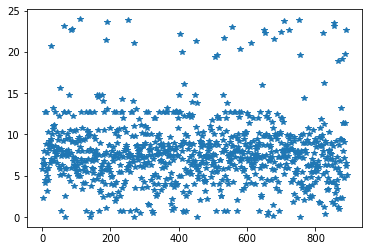

In [47]:
plt.plot(time_diff_of_traces, '*')
plt.show()

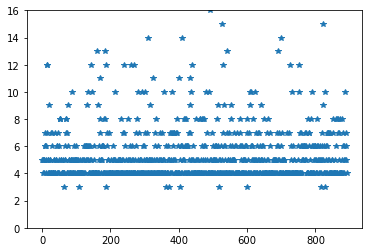

In [62]:
plt.plot(time_diff_of_traces_days, '*')
plt.ylim(0,16)
plt.show()